In [2]:
#requirements - which feature is most imp in prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\adity\\Downloads\\data_cardiovascular_risk.csv')

In [5]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [6]:
df.shape

(3390, 17)

In [7]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Text(0.5, 1.0, 'Count missing values (test data)')

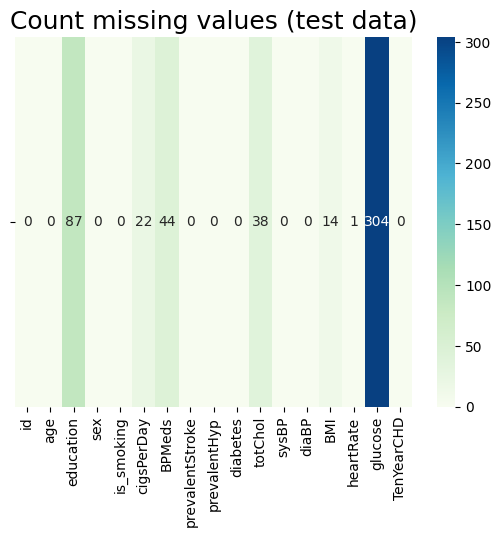

In [12]:
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)

Text(0.5, 1.0, 'Count missing values (test data)')

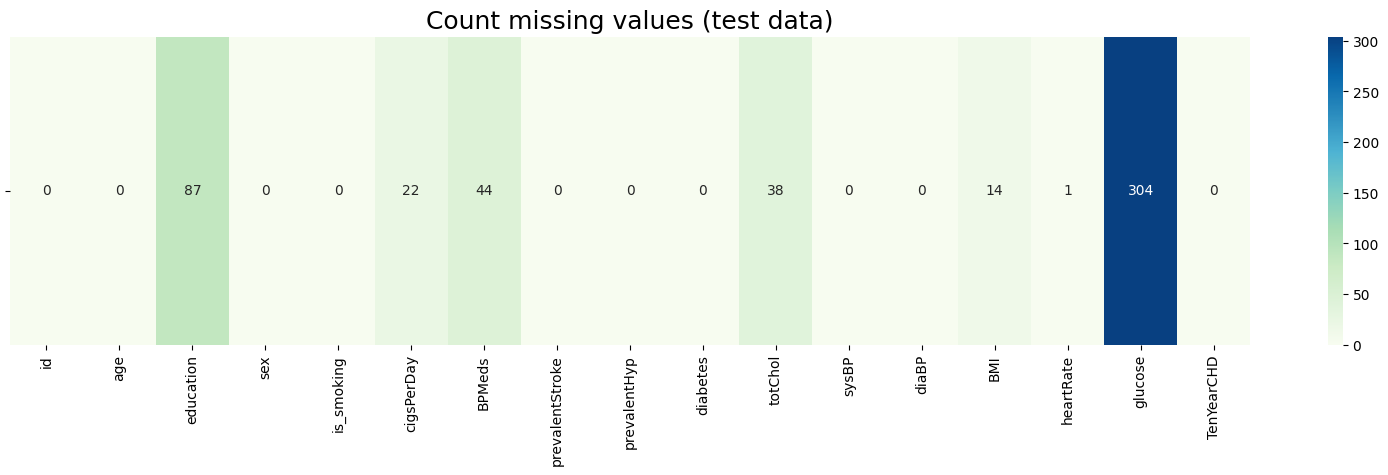

In [13]:
plt.figure(figsize=(20,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)

In [14]:
# plt.figure(figsize=(20,3))
# sns.heatmap((df.isna().sum()),cmap='RdBu', annot=True).set_title('Count missing values (test data)', fontsize=20)

Text(0.5, 1.0, 'Count missing values (test data)')

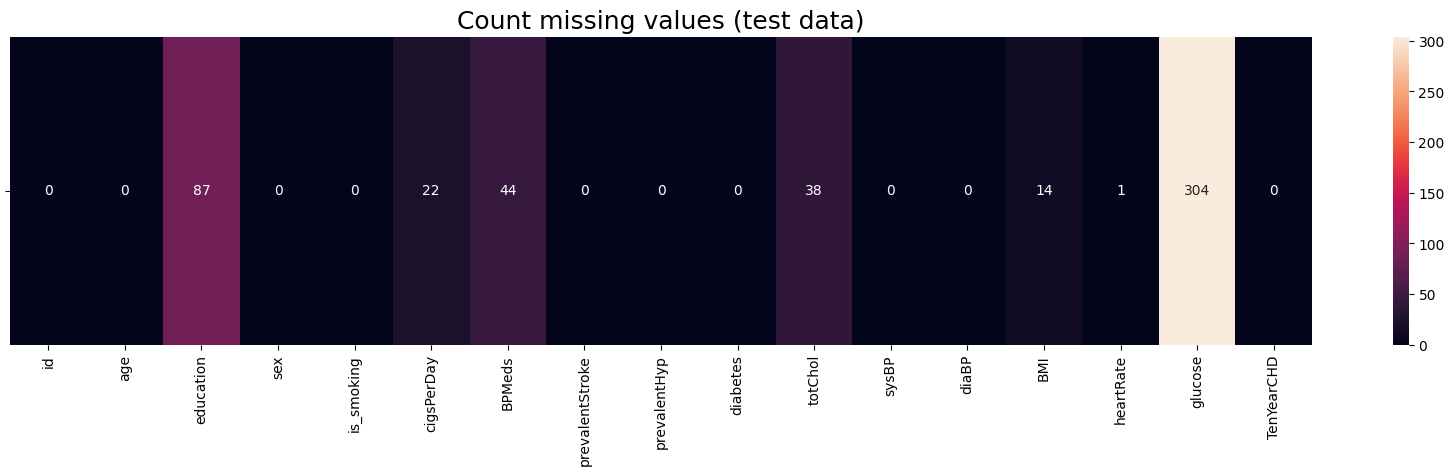

In [15]:
plt.figure(figsize=(21,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='rocket', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)

In [16]:
df.isnull().sum()/df.shape[0]*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [17]:
#to give a proper dataframe type
(df.isnull().sum()/df.shape[0]*100).to_frame()

,0
id,0.000000
age,0.000000
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,0.648968
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000


In [18]:
#Rename 0 to percentage
(df.isnull().sum()/df.shape[0]*100).to_frame().rename(columns={0:'Percentage'})

,Percentage
id,0.000000
age,0.000000
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,0.648968
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000


In [19]:
for col in df:
    a = df[col].unique()
    print(col,':\n',a)

id :
 [   0    1    2 ... 3387 3388 3389]
age :
 [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
education :
 [ 2.  4.  1.  3. nan]
sex :
 ['F' 'M']
is_smoking :
 ['YES' 'NO']
cigsPerDay :
 [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
BPMeds :
 [ 0. nan  1.]
prevalentStroke :
 [0 1]
prevalentHyp :
 [0 1]
diabetes :
 [0 1]
totChol :
 [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200.
 244. 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194.
 271. 

<Axes: xlabel='cigsPerDay', ylabel='Count'>

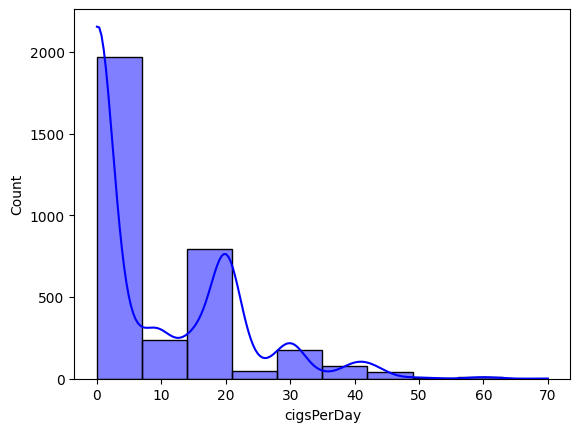

In [20]:
sns.histplot(df['cigsPerDay'], kde=True, color='blue', bins=10)


<Axes: xlabel='BPMeds', ylabel='Count'>

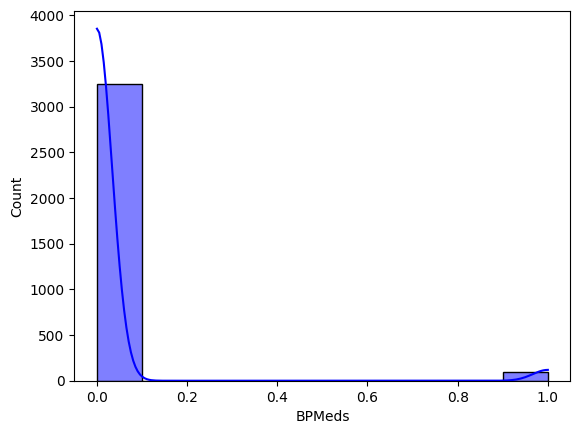

In [21]:
sns.histplot(df['BPMeds'], kde=True, color='blue', bins=10)


<Axes: xlabel='totChol', ylabel='Count'>

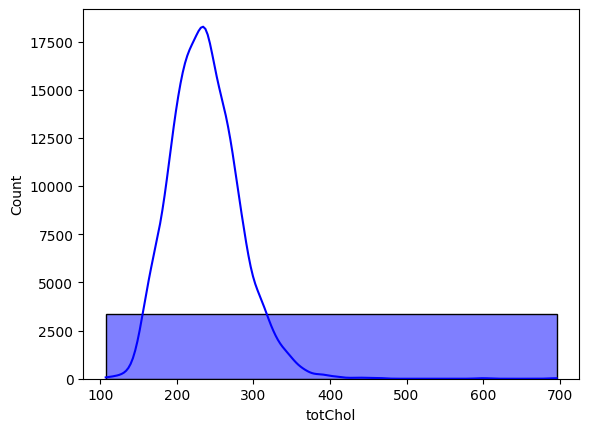

In [22]:
sns.histplot(df['totChol'], kde=True, color='blue', bins=1)

<Axes: xlabel='BMI', ylabel='Count'>

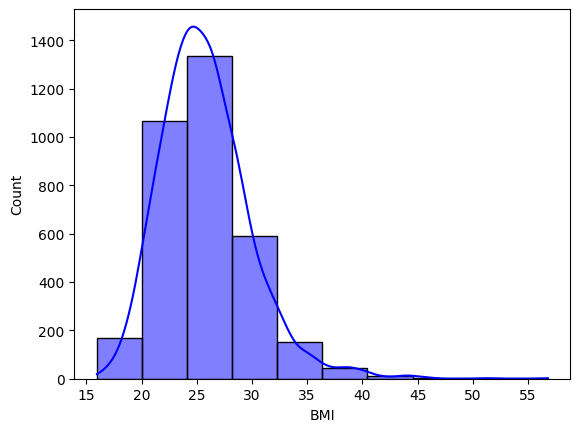

In [23]:
sns.histplot(df['BMI'], kde=True, color='blue', bins=10)


<Axes: xlabel='heartRate', ylabel='Count'>

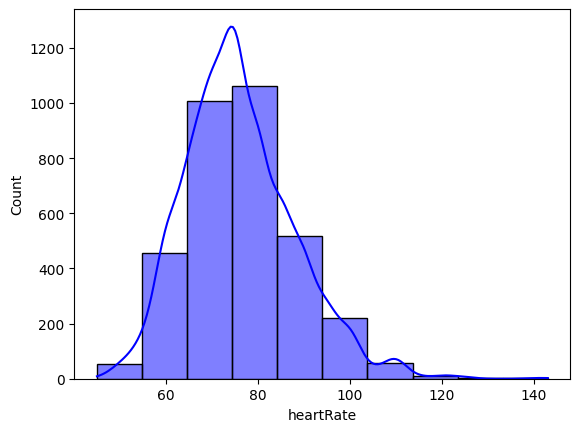

In [24]:
sns.histplot(df['heartRate'], kde=True, color='blue', bins=10)


<Axes: xlabel='glucose', ylabel='Count'>

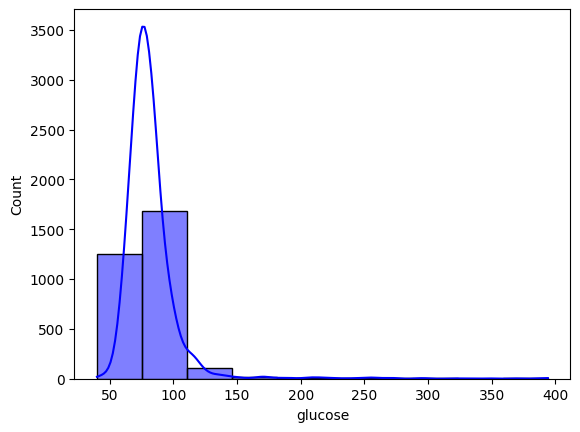

In [25]:
sns.histplot(df['glucose'], kde=True, color='blue', bins=10)

<Axes: xlabel='TenYearCHD', ylabel='Count'>

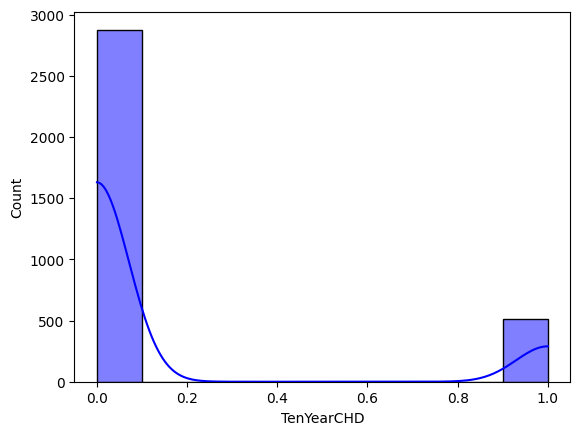

In [26]:
sns.histplot(df['TenYearCHD'], kde=True, color='blue', bins=10)

In [27]:
#Categorical - mode/max , numerical - medium
df['education'].fillna(df['education'].value_counts().idxmax(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].value_counts().idxmax(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [28]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [29]:
df.rename(columns={'sex':'gender','prevalentHyp':'prevalent_Hypertension'}, inplace=True)


In [30]:
df.columns


Index(['id', 'age', 'education', 'gender', 'is_smoking', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalent_Hypertension', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [31]:
df['is_smoking'].unique()


array(['YES', 'NO'], dtype=object)

In [32]:
data = df.copy()
data['gender'] = data.gender.replace(['M','F'],[0,1])
data['is_smoking'] = data.is_smoking.replace(['YES', 'NO'],[1,0])

In [33]:
data

,id,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,1,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,1,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,0,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [34]:
data.drop(['id'],axis=1,inplace=True)

In [35]:
data.corr()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170614,0.041882,-0.210997,-0.191465,0.122114,0.059038,0.308826,0.107875,0.271961,0.404845,0.221896,0.137478,-0.002636,0.112395,0.224927
education,-0.170614,1.000000,-0.025275,0.030193,0.014078,-0.019880,-0.031820,-0.081925,-0.051895,-0.021221,-0.132202,-0.060774,-0.135783,-0.039395,-0.039303,-0.051388
gender,0.041882,-0.025275,1.000000,-0.215485,-0.329308,0.043191,0.011273,-0.003072,-0.008853,0.070042,0.037369,-0.058840,-0.087093,0.118707,0.003016,-0.084647
is_smoking,-0.210997,0.030193,-0.215485,1.000000,0.763273,-0.037533,-0.043703,-0.119325,-0.053333,-0.047004,-0.145721,-0.124318,-0.172707,0.062152,-0.059353,0.034143
cigsPerDay,-0.191465,0.014078,-0.329308,0.763273,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025346,-0.100348,-0.068320,-0.099830,0.066229,-0.066374,0.068020
BPMeds,0.122114,-0.019880,0.043191,-0.037533,-0.035727,1.000000,0.116183,0.256892,0.070932,0.080918,0.260384,0.198780,0.087648,0.018107,0.061356,0.087349
prevalentStroke,0.059038,-0.031820,0.011273,-0.043703,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010769,0.057568,0.047235,0.017032,-0.019183,0.023662,0.068627
prevalent_Hypertension,0.308826,-0.081925,-0.003072,-0.119325,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158693,0.699285,0.612897,0.299615,0.150731,0.082962,0.166544
diabetes,0.107875,-0.051895,-0.008853,-0.053333,-0.048114,0.070932,0.010115,0.082565,1.000000,0.059194,0.124011,0.061165,0.087793,0.039746,0.609743,0.103681
totChol,0.271961,-0.021221,0.070042,-0.047004,-0.025346,0.080918,-0.010769,0.158693,0.059194,1.000000,0.197848,0.153825,0.113452,0.086955,0.060913,0.093605


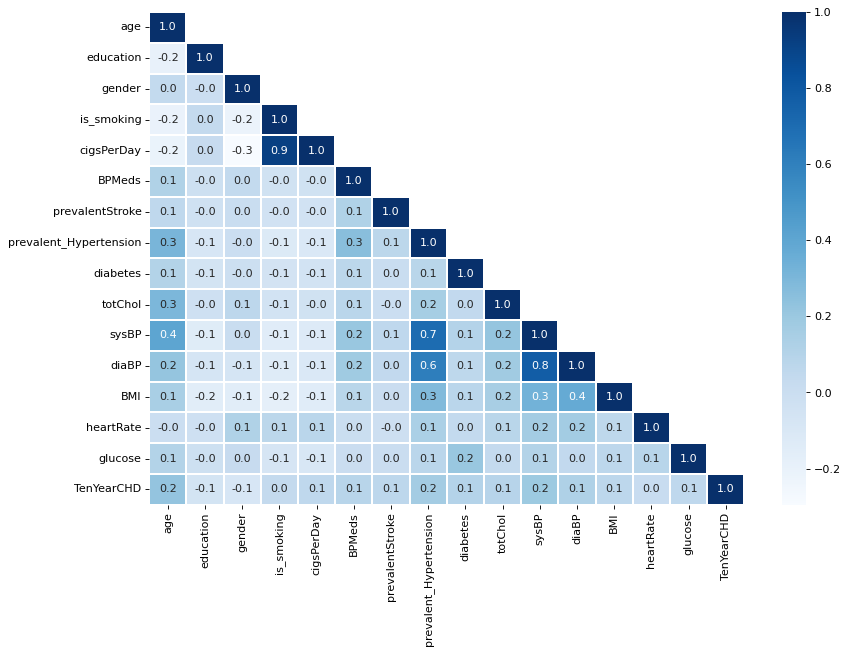

In [36]:
target_var = 'TenYearCHD'
df_ordered = pd.concat([data.drop(target_var,axis=1), df[target_var]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.1f', linewidths=0.2)
plt.show()

In [37]:
categorical=['gender','is_smoking','BPMeds','prevalentStroke','prevalent_Hypertension','diabetes','TenYearCHD']

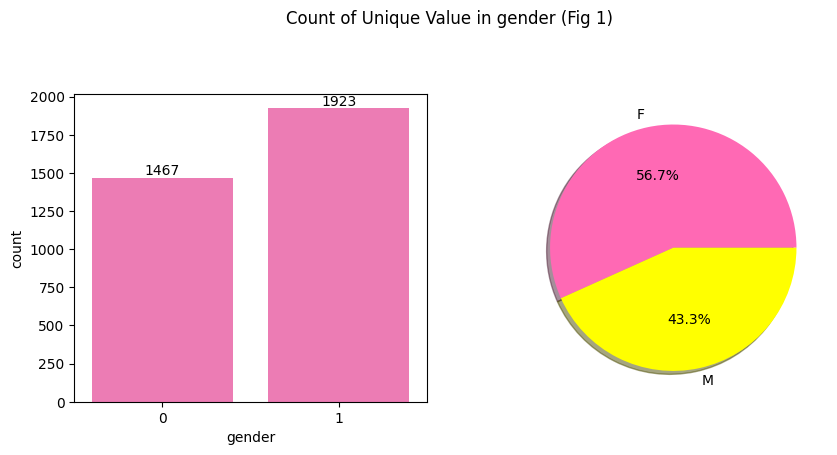

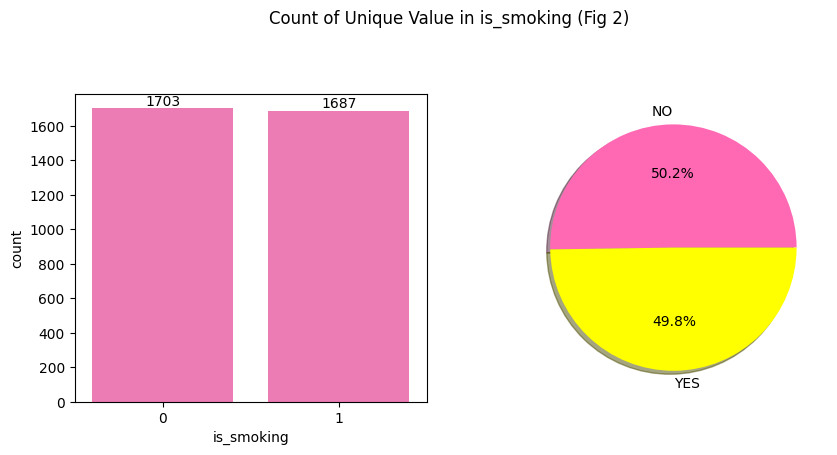

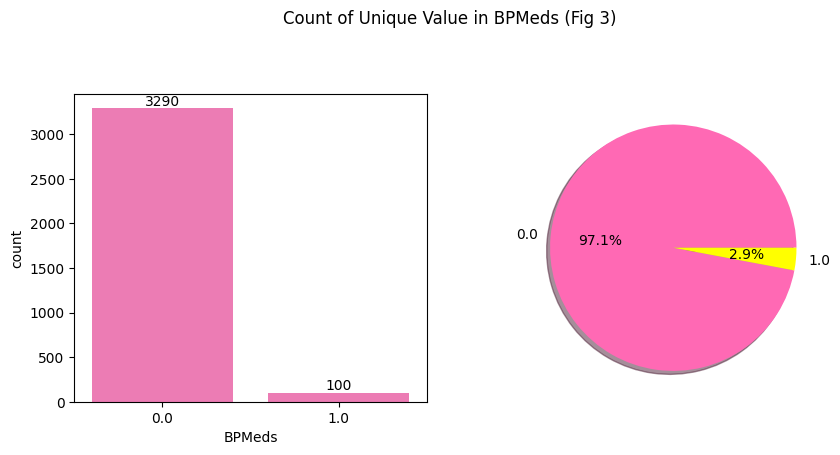

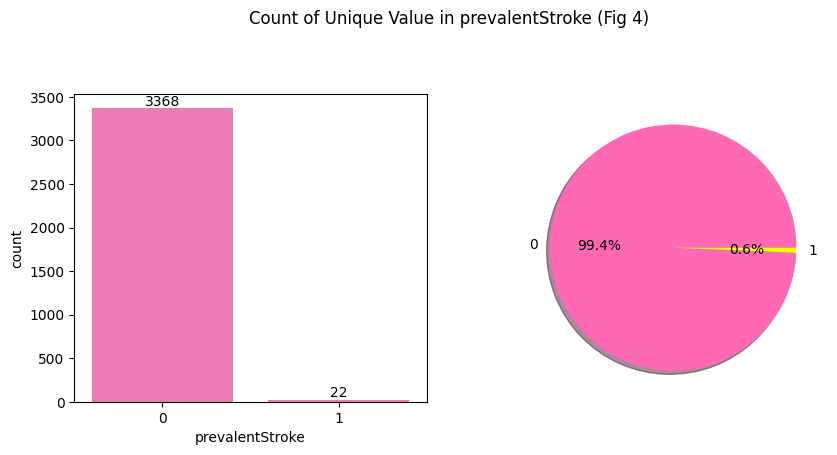

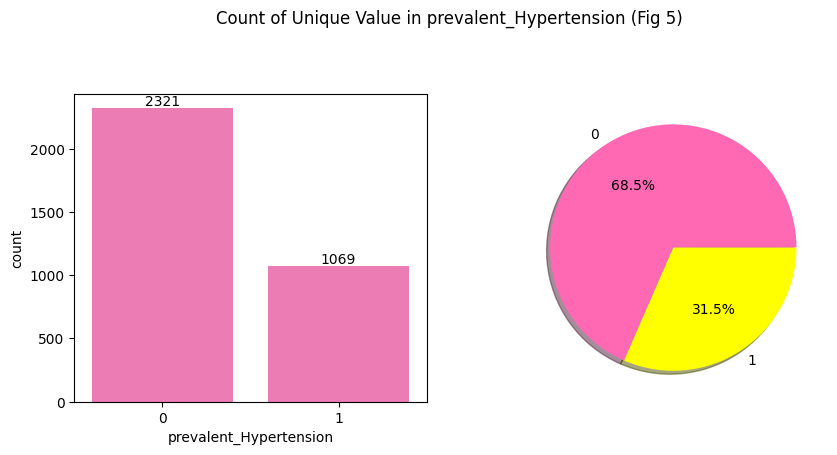

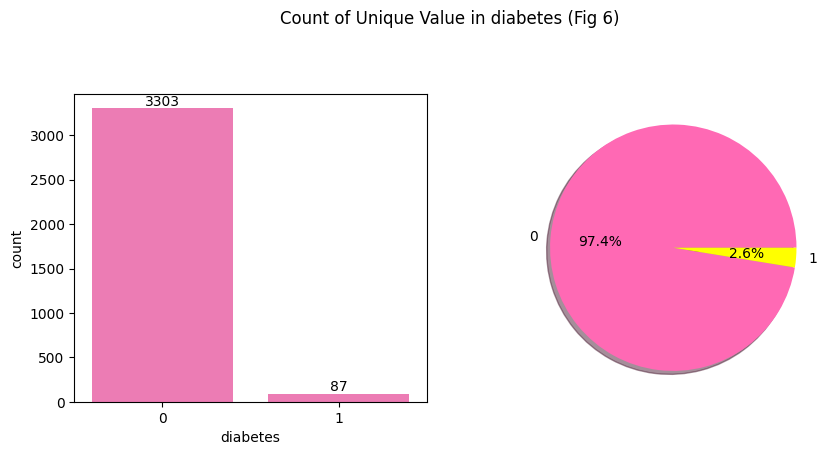

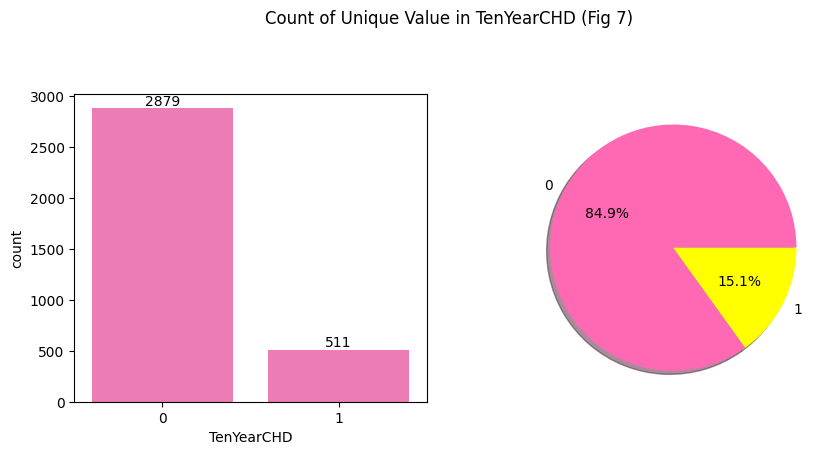

In [38]:
sns.set_palette(['hotpink', 'yellow'])
for i, col in enumerate(categorical):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=data, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09)
    plt.show()

In [39]:
numerical= ['prevalent_Hypertension','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']
Target='TenYearCHD'


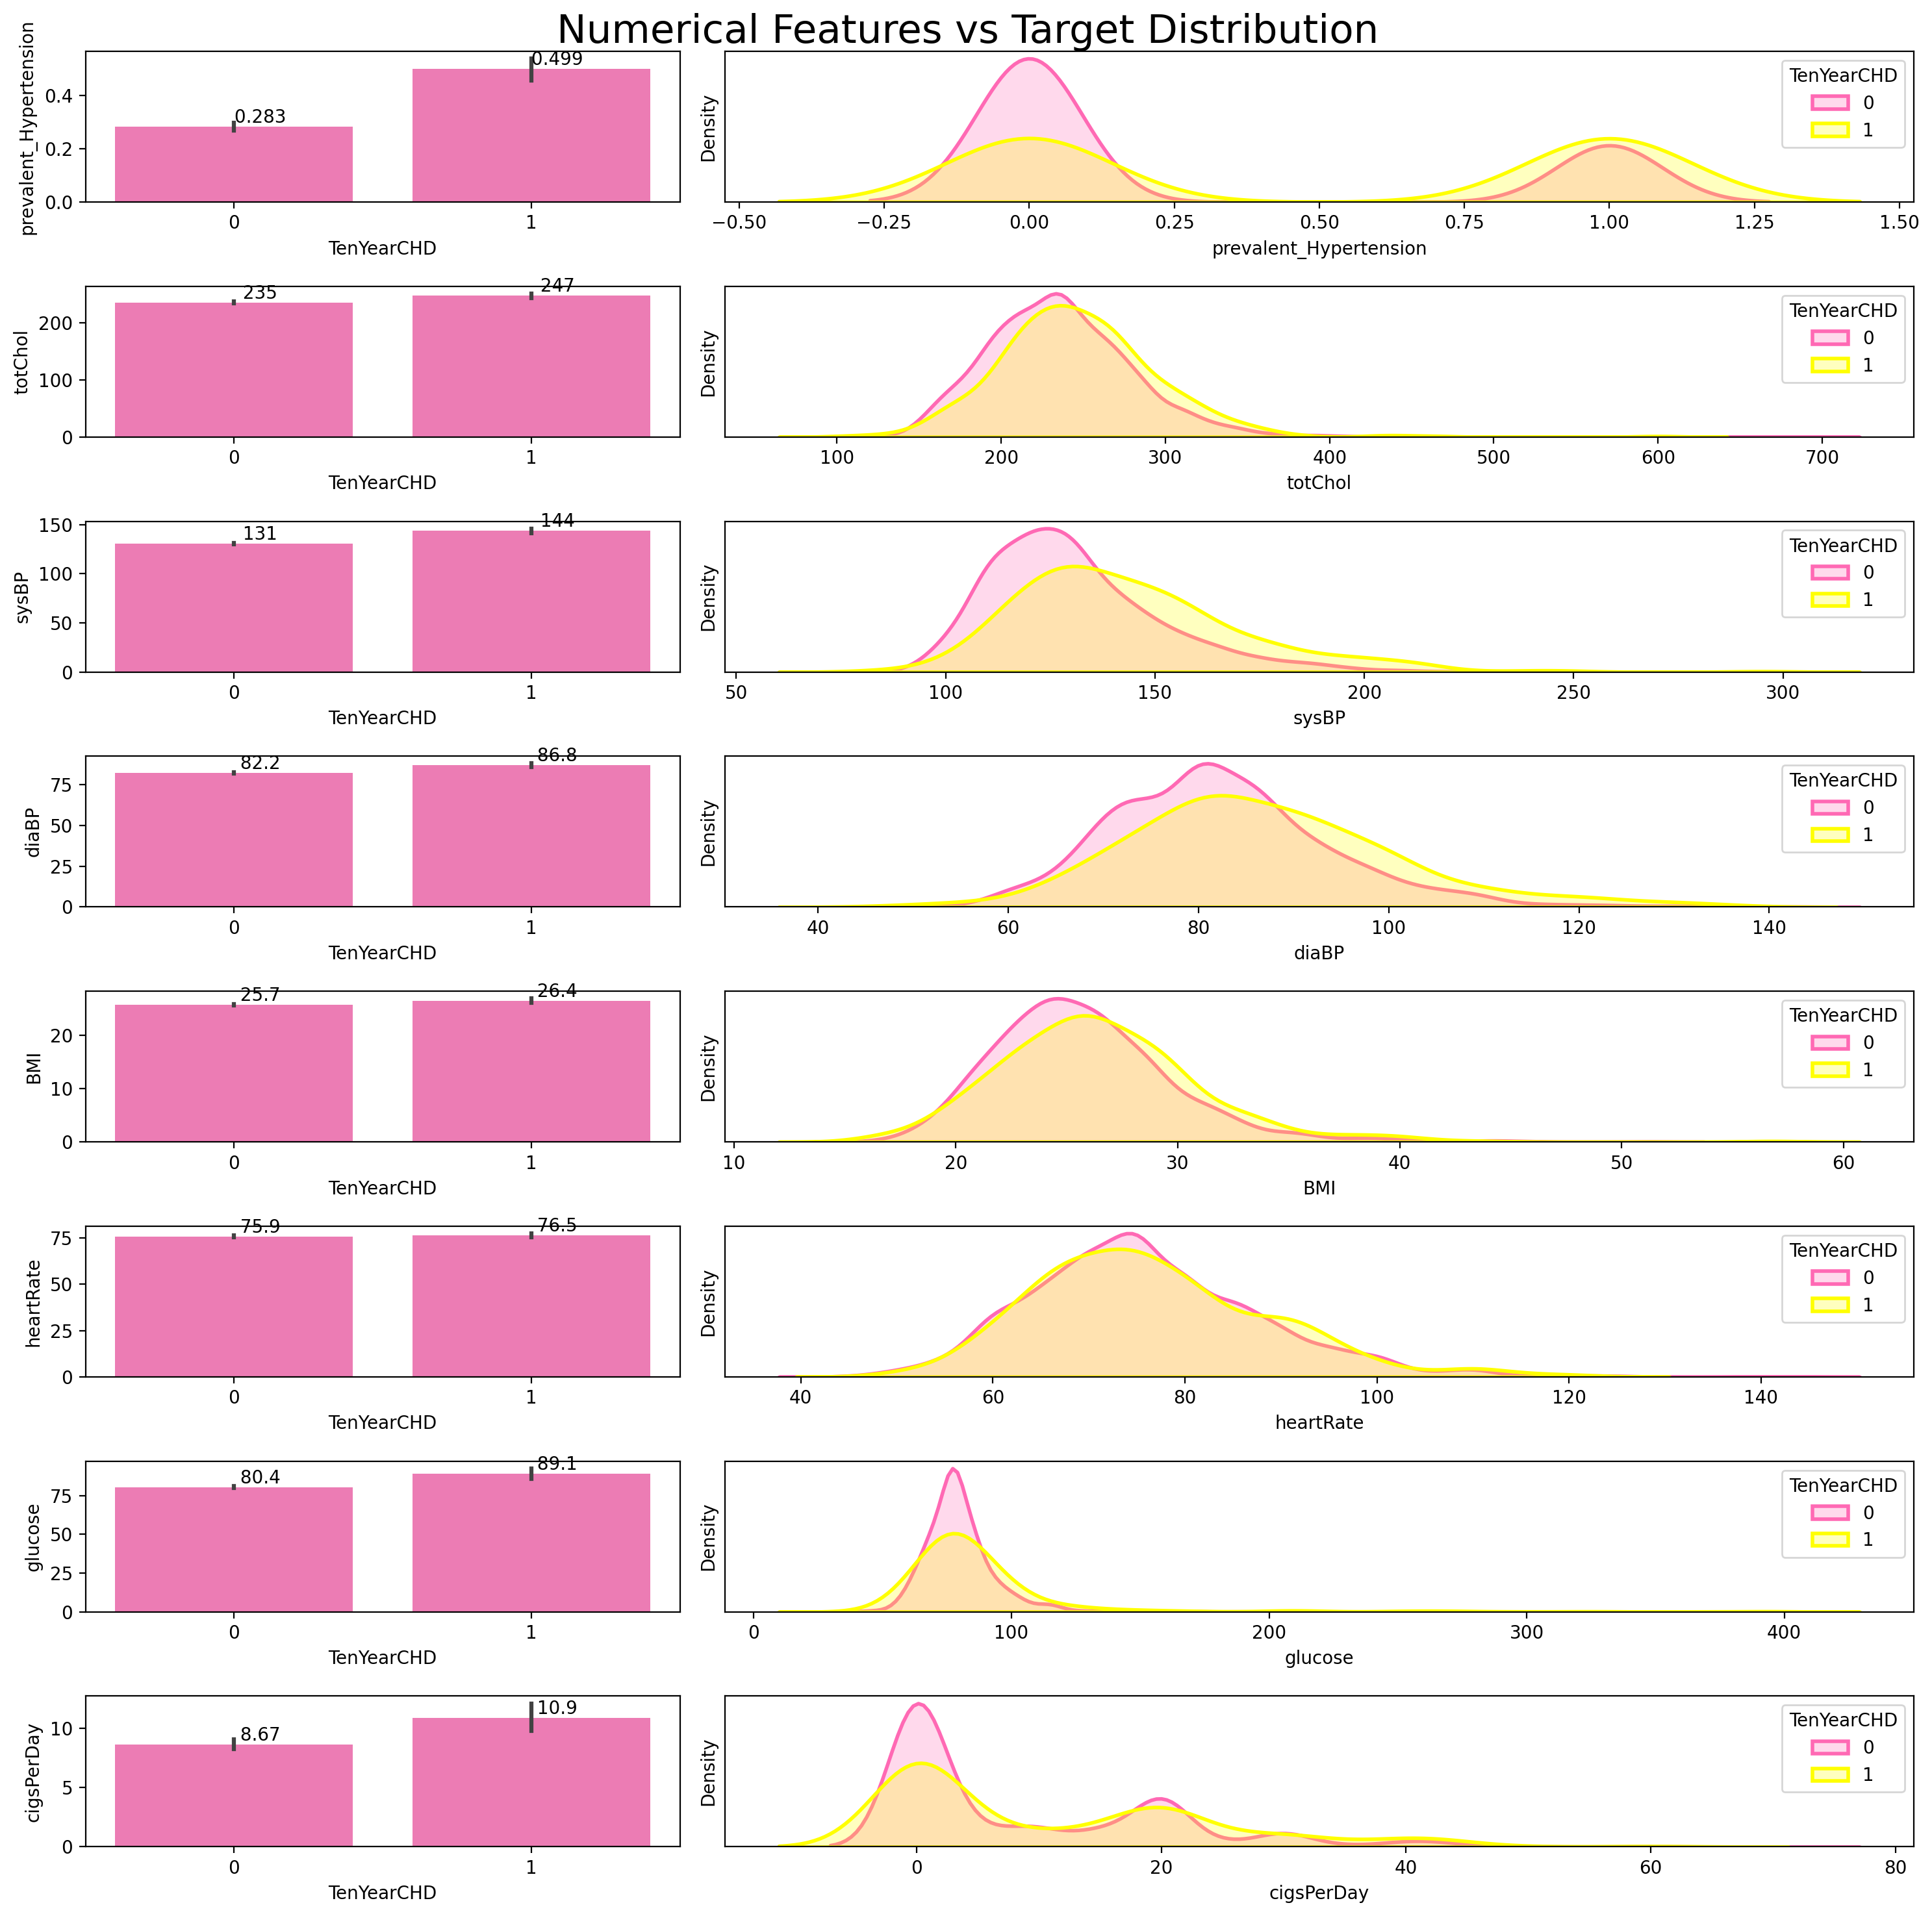

In [40]:
sns.set_palette(['hotpink', 'yellow'])

fig, ax = plt.subplots(8, 2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(numerical):
    # barplot
    graph = sns.barplot(data=data, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=data[data[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='TenYearCHD', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

In [41]:
num_cols = pd.DataFrame (data, columns= ['gender','is_smoking','BPMeds','prevalentStroke','prevalent_Hypertension','diabetes','TenYearCHD'])
cat_cols = pd.DataFrame (data, columns= ['prevalent_Hypertension','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay'])

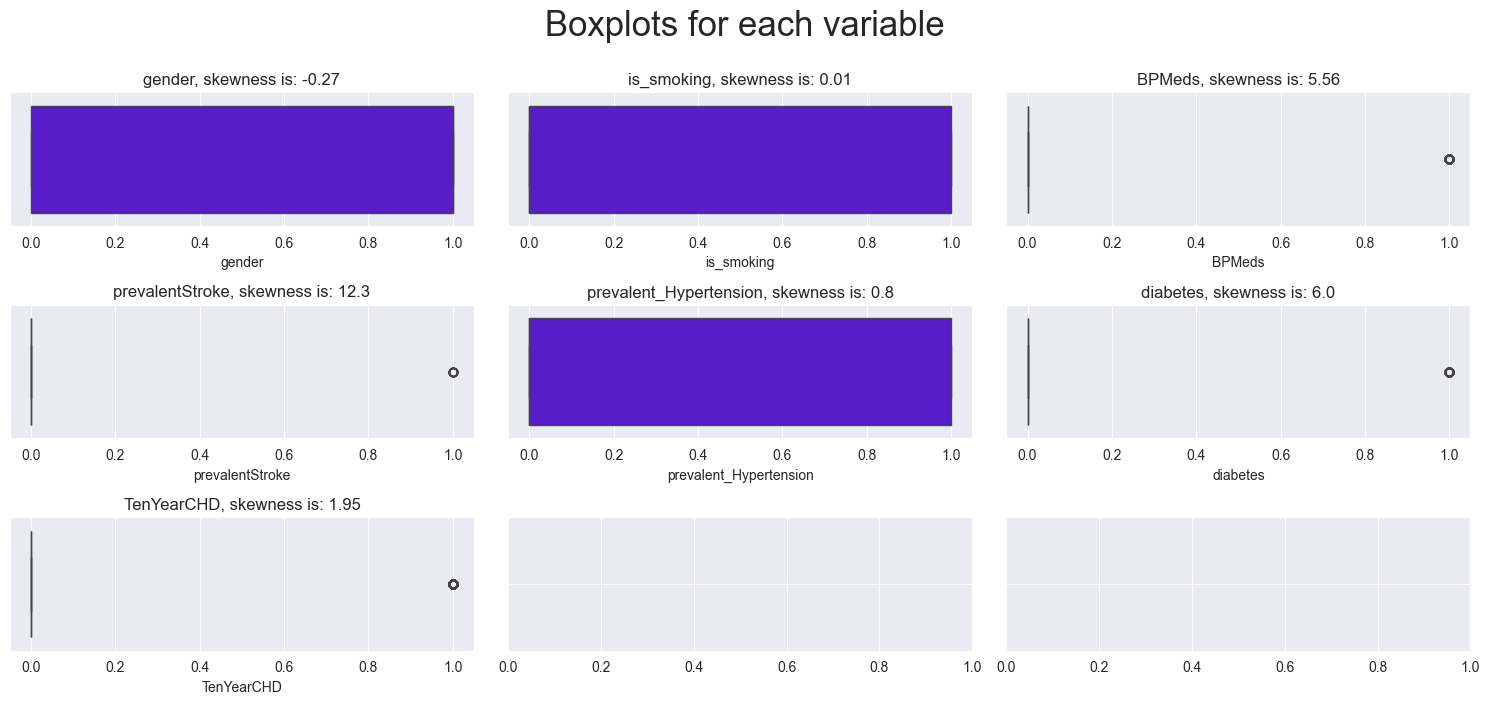

In [42]:
# Visualizing the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#4c00e6', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset=data, columns_list=num_cols, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [43]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,gender,is_smoking,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,TenYearCHD
0,0,0,100,22,0,87,511


In [44]:
# Separate numerical and categorical features into different lists
numerical_columns = list(data.loc[:,['gender','is_smoking','BPMeds','prevalentStroke','prevalent_Hypertension','diabetes','TenYearCHD']])
categorical_columns = list(data.loc[:,['prevalent_Hypertension','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']])

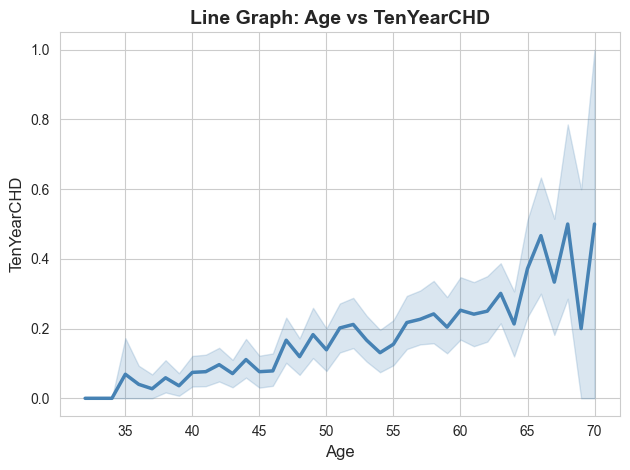

In [45]:
# Set the plot style
sns.set_style('whitegrid')

# Create the line plot
sns.lineplot(data=data, x=data['age'], y=data['TenYearCHD'], linewidth=2.5, color='steelblue')

# Set labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('TenYearCHD', fontsize=12)
plt.title('Line Graph: Age vs TenYearCHD', fontsize=14, fontweight='bold')

# Set ticks font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
pd.to_numeric(df.TenYearCHD,errors='coerce')

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [47]:
pd.to_numeric(data.TenYearCHD,errors='coerce')

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [48]:
df['TenYearCHD'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    2879
1     511
Name: TenYearCHD, dtype: int64>

In [49]:
# negative = data[data.TenYearCHD == 0]
# positive = data[data.TenYearCHD == 1]
# print(negative.shape)
# print(positive.shape)

In [50]:
# neg_std = negative.sample(n=600)
# neg_std.shape

In [51]:
# new_dataset = pd.concat([neg_std, positive], axis=0)
# new_dataset.head()

In [52]:
# new_dataset.tail()

In [53]:
# new_dataset['TenYearCHD'].value_counts()

In [54]:
# new_dataset.shape

In [55]:
data.head()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [56]:
data.drop(['education'], axis=1,inplace=True)

# *Data Normalization*

In [57]:
X=data.drop('TenYearCHD',axis=1)
Y=data['TenYearCHD']

In [58]:
from sklearn import preprocessing

# Normalization
transform = preprocessing.StandardScaler()
X_transform = transform.fit_transform(X)
X_transform

array([[ 1.6827831 ,  0.87342459,  1.00473095, ..., -0.10063528,
         1.17167454, -0.07427542],
       [-1.57621005, -1.14491853, -0.99529132, ...,  0.96842246,
        -0.3322924 , -0.29018495],
       [-0.41228392,  0.87342459,  1.00473095, ..., -1.32554655,
         1.0045671 ,  0.53027124],
       ...,
       [-0.64506915, -1.14491853,  1.00473095, ...,  0.7614295 ,
        -0.24873868, -0.41973066],
       [ 1.21721265, -1.14491853, -0.99529132, ..., -0.67778035,
         0.33613735,  0.1416341 ],
       [ 0.51885698,  0.87342459, -0.99529132, ...,  0.99520978,
         0.25258363,  0.44390743]])

In [59]:
# Seed used in this work
seed = 12

In [60]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

def adasyn_sampling(threshold):
    # ADASYN and RandomUnderSampler
    over_sampler = ADASYN(sampling_strategy=threshold, random_state=seed)
    under_sampler = RandomUnderSampler(sampling_strategy=1.0)
    
    # Perform over-sampling and under-sampling
    X_oversampled, Y_oversampled = over_sampler.fit_resample(X_transform, Y)
    X_sampled, Y_sampled = under_sampler.fit_resample(X_oversampled, Y_oversampled)
    
    return X_sampled, Y_sampled

X_sampled, Y_sampled = adasyn_sampling(0.5)

In [61]:
y_df = pd.DataFrame(Y_sampled)
y_df

,TenYearCHD
0,0
1,0
2,0
3,0
4,0
...,...
2713,1
2714,1
2715,1
2716,1


In [62]:
y_df.shape

(2718, 1)

In [63]:
x_df = pd.DataFrame(X_sampled)
x_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.576210,-1.144919,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.956705,-0.699958,0.592004,0.313351,-0.248739,0.227998
1,-0.179499,-1.144919,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-1.245674,0.915207,0.841551,0.863708,2.257873,0.271180
2,-1.227032,0.873425,1.004731,0.504960,-0.174342,-0.080821,-0.678658,-0.162295,0.399225,0.421685,0.217685,-0.219961,2.007212,1.134818
3,-0.877854,0.873425,1.004731,-0.000895,-0.174342,-0.080821,-0.678658,-0.162295,-0.134255,-1.014018,-0.239817,-1.625078,0.169030,-0.506094
4,1.915568,-1.144919,1.004731,0.757888,-0.174342,-0.080821,-0.678658,-0.162295,-0.045342,0.421685,-0.572546,0.140451,-1.585598,0.487089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,1.592407,-1.144919,1.004731,3.025311,-0.174342,-0.080821,1.473495,-0.162295,-0.441165,0.932414,1.172518,0.744516,-0.458508,0.404384
2714,0.910082,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.370356,0.046732,-0.476773,1.251246,-1.120783,0.008820
2715,0.545287,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.180354,-0.061926,-0.192365,0.956359,-1.001750,-0.065001
2716,-0.604734,-1.144919,1.004731,-0.341189,-0.174342,-0.080821,1.473495,-0.162295,2.385909,1.325808,2.802504,0.791248,-0.181177,-0.314980


In [64]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

In [66]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [67]:
X_train

array([[-1.12803338,  0.86975668, -0.99265236, ..., -1.44893355,
        -0.34022878, -0.89644988],
       [-1.24429189,  0.86975668,  1.00740203, ..., -1.4441252 ,
         0.32827363,  0.12390202],
       [-0.54674081, -1.14974685,  1.00740203, ..., -0.48486076,
        -0.08954038, -0.12098243],
       ...,
       [-0.4304823 ,  0.86975668,  1.00740203, ..., -1.12196622,
        -0.08954038, -0.16179651],
       [-1.01177486,  0.86975668,  1.00740203, ..., -0.38148139,
        -0.34022878, -0.20261058],
       [ 1.3133954 ,  0.86975668,  1.00740203, ..., -0.62670688,
        -0.92516839, -0.6923795 ]])

In [68]:
y_train

406     0
461     0
1288    1
1702    0
1279    0
       ..
3357    0
2282    0
144     0
2908    0
259     0
Name: TenYearCHD, Length: 2712, dtype: int64

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Comparing the models with default hyperparameter values using Cross Validation

In [70]:
X = scale.transform(X)

In [71]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=42)]

In [72]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, Y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [73]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.85545723 0.85545723 0.86430678 0.85103245 0.8539823 ]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 85.6 %
---------------------------------------------------------------


Cross Validation accuracies for the SVC(kernel='linear') = [0.8480826  0.84365782 0.84955752 0.84955752 0.84955752]
Acccuracy score of the  SVC(kernel='linear') = 84.81 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.83185841 0.83333333 0.83628319 0.82448378 0.83038348]
Acccuracy score of the  KNeighborsClassifier() = 83.13 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=42) = [0.84955752 0.85988201 0.85545723 0.84955752 0.84365782]
Acccuracy score of the  RandomForestClassifier(random_state=42) = 85.16 %
---------------------------------------------------------------


In [74]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]


In [75]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
}

In [76]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [77]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]
 
    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,Y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [78]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------


SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.856047,{'C': 1}
1,SVC(),0.850442,"{'C': 1, 'kernel': 'poly'}"
2,KNeighborsClassifier(),0.845133,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.851032,{'n_estimators': 100}


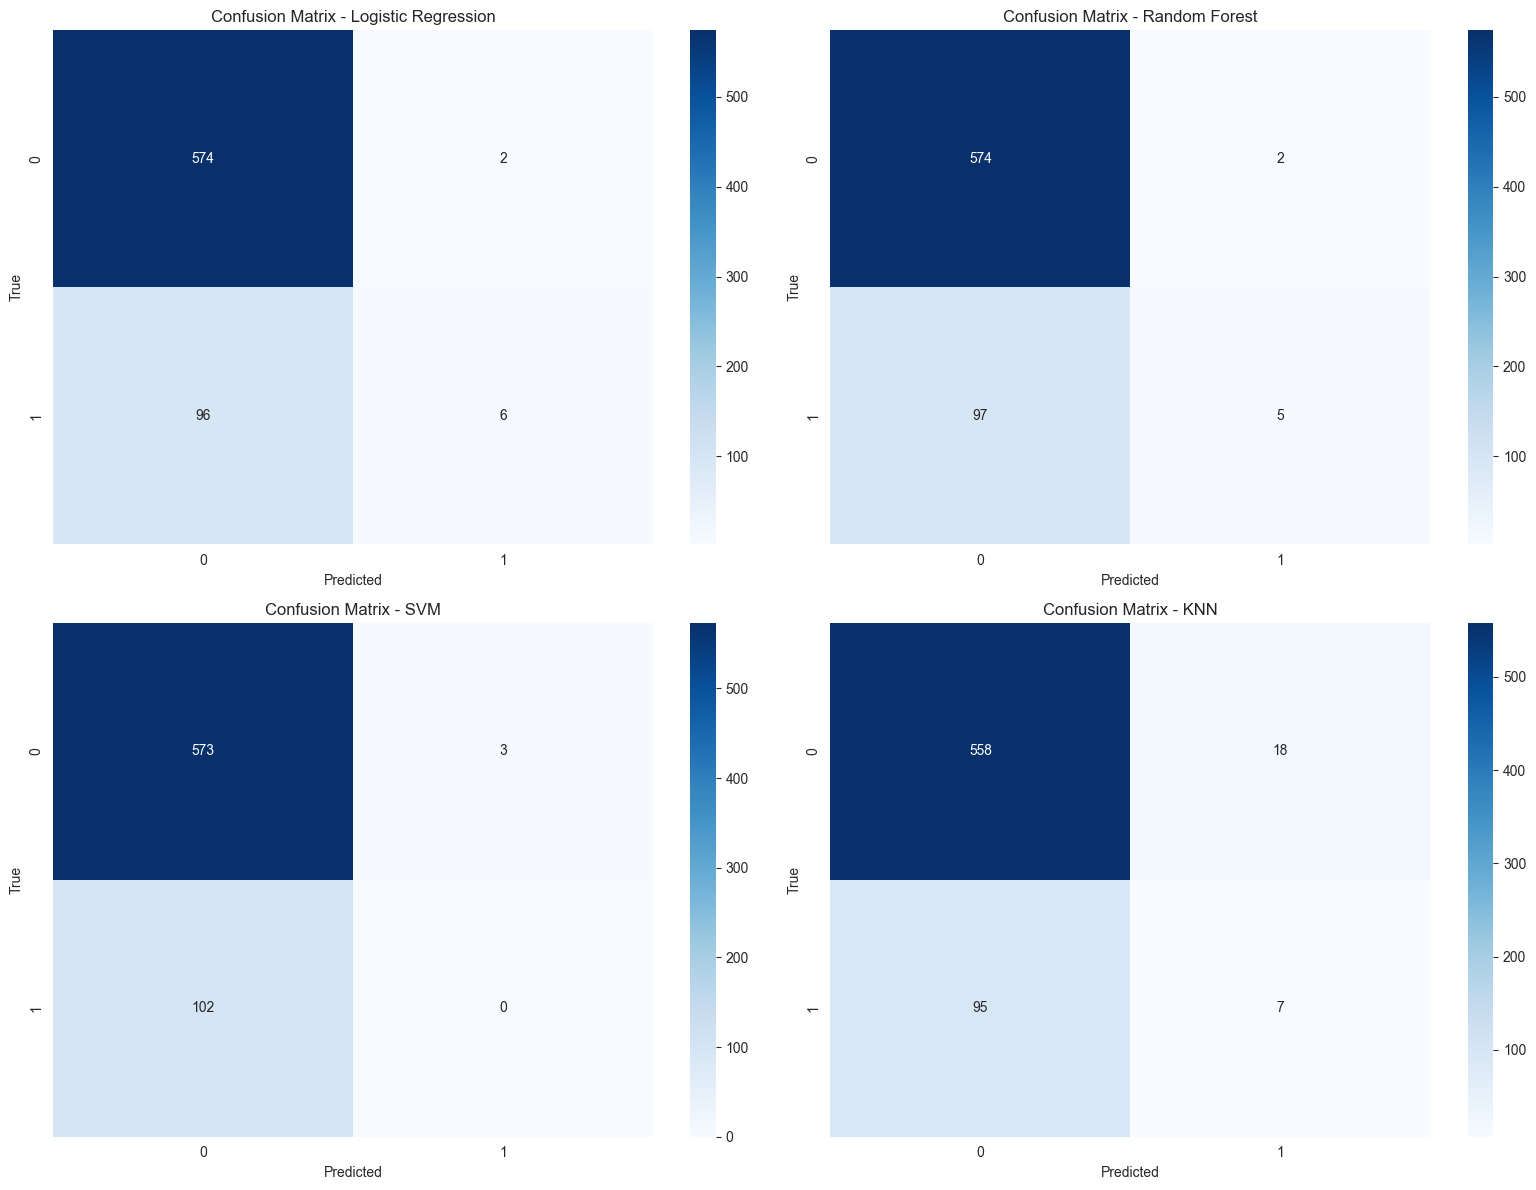

In [79]:
from sklearn.metrics import confusion_matrix
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}
# Create confusion matrices and plot
plt.figure(figsize=(16, 12))
for i, (name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

In [80]:
# classifier = RandomForestClassifier(random_state=0, n_estimators=50)
# classifier.fit(X_train,y_train)

In [81]:
# from sklearn.metrics import accuracy_score
# x_train_pred = classifier.predict(X_train)
# training_data_acc_score = accuracy_score(x_train_pred, y_train)
# print(f"Accuracy score of the trainig data: {training_data_acc_score} ")

# # Acc score for the test set
# x_test_pred = classifier.predict(X_test)
# test_data_acc_score = accuracy_score(x_test_pred, y_test)
# print(f"Accuracy score of the testing data: {test_data_acc_score} ")

In [82]:
model = LogisticRegression()


In [83]:
#training
model.fit(X_train,y_train)

LogisticRegression()

In [84]:
from sklearn.metrics import accuracy_score
x_train_pred = model.predict(X_train)
training_data_acc_score = accuracy_score(x_train_pred, y_train)
print(f"Accuracy score of the trainig data: {training_data_acc_score} ")

# Acc score for the test set
x_test_pred = model.predict(X_test)
test_data_acc_score = accuracy_score(x_test_pred, y_test)
print(f"Accuracy score of the testing data: {test_data_acc_score} ")

Accuracy score of the trainig data: 0.8591445427728613 
Accuracy score of the testing data: 0.855457227138643 


In [85]:
data.columns

Index(['age', 'gender', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalent_Hypertension', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [86]:
data.shape

(3390, 15)

In [87]:
df

,id,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [88]:
pd.DataFrame(X_sampled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.576210,-1.144919,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.956705,-0.699958,0.592004,0.313351,-0.248739,0.227998
1,-0.179499,-1.144919,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-1.245674,0.915207,0.841551,0.863708,2.257873,0.271180
2,-1.227032,0.873425,1.004731,0.504960,-0.174342,-0.080821,-0.678658,-0.162295,0.399225,0.421685,0.217685,-0.219961,2.007212,1.134818
3,-0.877854,0.873425,1.004731,-0.000895,-0.174342,-0.080821,-0.678658,-0.162295,-0.134255,-1.014018,-0.239817,-1.625078,0.169030,-0.506094
4,1.915568,-1.144919,1.004731,0.757888,-0.174342,-0.080821,-0.678658,-0.162295,-0.045342,0.421685,-0.572546,0.140451,-1.585598,0.487089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,1.592407,-1.144919,1.004731,3.025311,-0.174342,-0.080821,1.473495,-0.162295,-0.441165,0.932414,1.172518,0.744516,-0.458508,0.404384
2714,0.910082,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.370356,0.046732,-0.476773,1.251246,-1.120783,0.008820
2715,0.545287,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.180354,-0.061926,-0.192365,0.956359,-1.001750,-0.065001
2716,-0.604734,-1.144919,1.004731,-0.341189,-0.174342,-0.080821,1.473495,-0.162295,2.385909,1.325808,2.802504,0.791248,-0.181177,-0.314980


In [89]:
Y_sampled

0       0
1       0
2       0
3       0
4       0
       ..
2713    1
2714    1
2715    1
2716    1
2717    1
Name: TenYearCHD, Length: 2718, dtype: int64

In [90]:
data

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,0,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [91]:
combined_horizontally = pd.concat([x_df, y_df], axis=1)
print("\nCombined horizontally:")
pd.DataFrame(combined_horizontally)


Combined horizontally:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,TenYearCHD
0,-1.576210,-1.144919,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.956705,-0.699958,0.592004,0.313351,-0.248739,0.227998,0
1,-0.179499,-1.144919,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-1.245674,0.915207,0.841551,0.863708,2.257873,0.271180,0
2,-1.227032,0.873425,1.004731,0.504960,-0.174342,-0.080821,-0.678658,-0.162295,0.399225,0.421685,0.217685,-0.219961,2.007212,1.134818,0
3,-0.877854,0.873425,1.004731,-0.000895,-0.174342,-0.080821,-0.678658,-0.162295,-0.134255,-1.014018,-0.239817,-1.625078,0.169030,-0.506094,0
4,1.915568,-1.144919,1.004731,0.757888,-0.174342,-0.080821,-0.678658,-0.162295,-0.045342,0.421685,-0.572546,0.140451,-1.585598,0.487089,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,1.592407,-1.144919,1.004731,3.025311,-0.174342,-0.080821,1.473495,-0.162295,-0.441165,0.932414,1.172518,0.744516,-0.458508,0.404384,1
2714,0.910082,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.370356,0.046732,-0.476773,1.251246,-1.120783,0.008820,1
2715,0.545287,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.180354,-0.061926,-0.192365,0.956359,-1.001750,-0.065001,1
2716,-0.604734,-1.144919,1.004731,-0.341189,-0.174342,-0.080821,1.473495,-0.162295,2.385909,1.325808,2.802504,0.791248,-0.181177,-0.314980,1


In [92]:
input_data = (0.545287,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.180354,-0.061926,-0.192365,0.956359,	-1.001750,-0.065001)
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
pred = model.predict(input_data_reshaped)
print(pred)
if(pred[0]==0):
    print("jee lo apni zindagi")
else:
    print("Sorry") #0.635250,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,1.473495,-0.162295,-0.245397,0.376819,0.092911,0.439982,-0.582954,-0.376549

[0]
jee lo apni zindagi


In [93]:
input_data = (0.545287,0.873425,-0.995291,-0.759679,-0.174342,-0.080821,-0.678658,-0.162295,-0.180354,-0.061926,-0.192365,0.956359,	-1.001750,-0.065001)
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
pred = model.predict(input_data_reshaped)
print(pred)
if(pred[0]==0):
    print("jee lo apni zindagi")
else:
    print("Sorry")

[0]
jee lo apni zindagi


In [94]:
knn_model = KNeighborsClassifier(n_neighbors=5) # You can change the value of 'k' as needed.

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
# Step 5: Evaluate the model's performance using the testing data

# Make predictions on the test data.

y_pred = knn_model.predict(X_test)

In [96]:
# Calculate the accuracy of the model.

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 83.33%


In [97]:
# Display the classification report and confusion matrix.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Classification Report:")

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       576
           1       0.28      0.07      0.11       102

    accuracy                           0.83       678
   macro avg       0.57      0.52      0.51       678
weighted avg       0.77      0.83      0.79       678

Confusion Matrix:
[[558  18]
 [ 95   7]]


In [98]:
x_train_pred = knn_model.predict(X_train)
training_data_acc_score = accuracy_score(x_train_pred, y_train)
print(f"Accuracy score of the trainig data: {training_data_acc_score} ")

# Acc score for the test set
x_test_pred = knn_model.predict(X_test)
test_data_acc_score = accuracy_score(x_test_pred, y_test)
print(f"Accuracy score of the testing data: {test_data_acc_score} ")

Accuracy score of the trainig data: 0.8683628318584071 
Accuracy score of the testing data: 0.8333333333333334 


In [99]:
input_data = (46,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0)
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
pred = model.predict(input_data_reshaped)
print(pred)
if(pred[0]==0):
    print("jee lo apni zindagi")
else:
    print("Sorry")

[1]
Sorry


In [100]:
import pickle

filename = 'heart_pred.sav'
pickle.dump(model, open(filename, 'wb'))

In [101]:
# loading the saved model
loaded_model = pickle.load(open('heart_pred.sav', 'rb'))